# Diabetes Disease Classification Using Machine Learning: Implementation and Evaluation

## What is Diabetes?

Diabetes is a chronic health condition characterized by **high blood glucose (sugar) levels**. It occurs when **the body doesn't produce enough insulin** or cannot effectively use the insulin it produces.

## About Project

- **Problem Statement:** The objective of the dataset is to predict the presence of diabetes in patients using specific diagnostic measurements.
- By using the medical variables dataset, we will train a model to predict whether or not patients have diabetes.
- We will check the accuracy of the model and try to increase it by using hyperparameter tuning.

## Downloading dataset from kaggle

In [46]:
import opendatasets as od

dataset_url = "https://www.kaggle.com/datasets/ineubytes/pima-diabetes-dataset"
od.download(dataset_url)

Skipping, found downloaded files in ".\pima-diabetes-dataset" (use force=True to force download)


# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import missingno

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix


# Remove warnings
import warnings 
warnings.filterwarnings('ignore')

# 2. Loading the dataset

In [3]:
df_diabetes = pd.read_csv("diabetes-ml-classification/pima-diabetes-dataset/diabetes.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes-ml-classification/pima-diabetes-dataset/diabetes.csv'

# 3. Exploratory Data Analysis(EDA)

## 3.1 Understanding the dataset

In [49]:
df_diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [50]:
df_diabetes.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [80]:
# columns of dataset
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### About the dataset variables

**Pregnancies:-** Number of pregnancies

**Glucose:-** Quantity of Glucose  concentration in the body

**BloodPressure:-** BloodPressure of body(mm hg)

**SkinThickness:-** Body Skin fold Thickness(mm)

**Insulin:-** Insulin quantity(mu U/ml)

**BMI:-** Body Mass Index (weight (kg) / [height (m)]2)

**DiabetesPedigreeFunction:-**  Calculates diabetes likelihood depending on the subject's age and his/her diabetic family history

**Age:-** Age of person(years)

**Outcome:-** Outcome are in 0(Not Diabetes) and 1(Diabetes).



In [52]:
df_diabetes.shape

(768, 9)

- We can see that there are a total of 768 rows and 9 columns in the dataset.
- Among these 9 columns, the 'Outcome' column is the dependent variable, while the other columns represent independent variables.

In [53]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- In the dataset all variables have integer type data except 'BMI' and 'DiabetesPedigreeFunction' which are holding float values.

In [54]:
df_diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

**CONCLUSION:** 
- Based on the overall statistical analysis, it appears that there are some mistakes in the data entry process.
- Specifically, columns such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI have a minimum value of zero,which is not possible.
- Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution.
- Also in the max column we can see insulin levels as high as 846! We have to treat outliers.

## 3.2 Data Cleaning

In [55]:
#dropping duplicate values

df_diabetes=df_diabetes.drop_duplicates()

In [56]:
# creating a copy of dataset

copy_df = df_diabetes.copy(deep = True)

In [57]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [58]:
# Replacing zero with NaN in the copied dataset

copy_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = copy_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [59]:
copy_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [60]:
# Calulating percentage of missing data
((copy_df.isnull().sum())/len(copy_df))*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

- We can see that a significant percentage of the data values are missing.
- Therefore, we cannot remove this data, and instead, we need to fill in the missing values through imputation.

<Axes: >

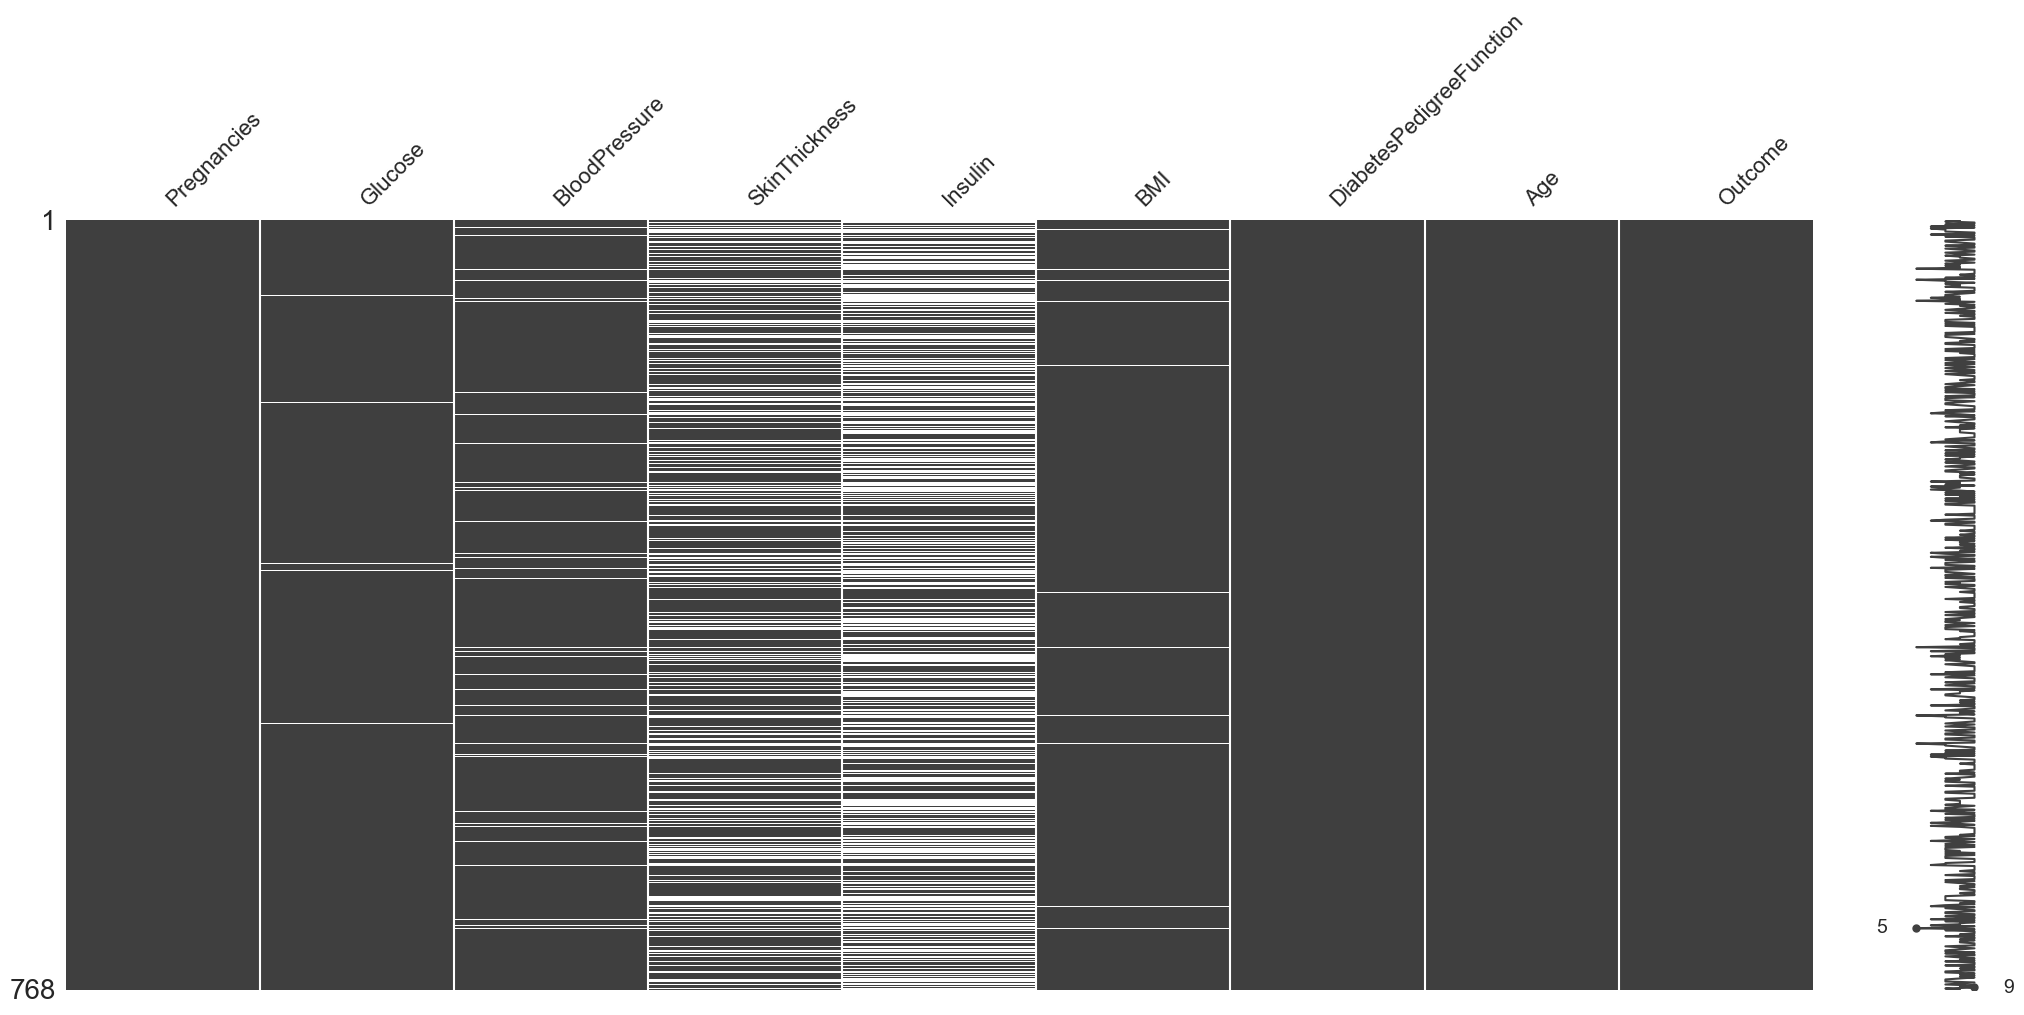

In [61]:
# Missing data in dataset

missingno.matrix(copy_df)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >]], dtype=object)

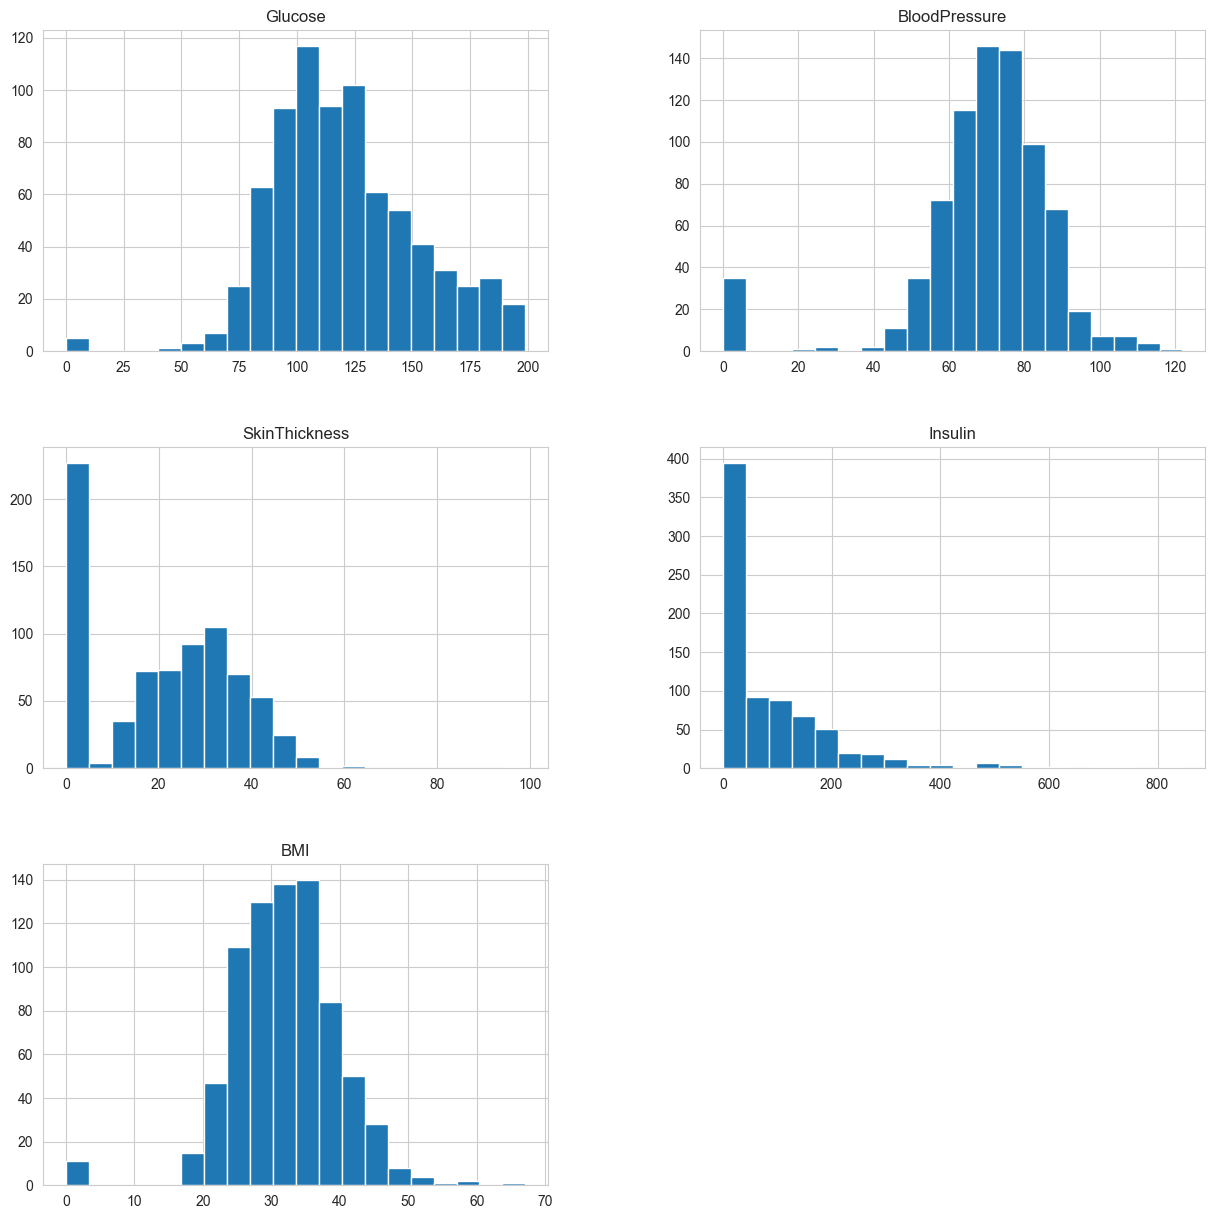

In [62]:
# Looking data distribution with histogram

df_diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].hist(bins = 20 ,figsize=(15,15))

In [63]:
df_diabetes.groupby('Outcome').agg(['mean','median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.298000    2.0  109.980000  107.0     68.184000   70.0   
1          4.865672    4.0  141.257463  140.0     70.824627   74.0   

        SkinThickness            Insulin               BMI         \
                 mean median        mean median       mean median   
Outcome                                                             
0           19.664000   21.0   68.792000   39.0  30.304200  30.05   
1           22.164179   27.0  100.335821    0.0  35.142537  34.25   

        DiabetesPedigreeFunction               Age         
                            mean median       mean median  
Outcome                                                    
0                       0.429734  0.336  31.190000   27.0  
1                       0.550500  0.449  37.067164   36.0

**CONCLUSION:-**
- For the columns SkinThickness and Insulin, there is a significant difference between the mean and median values for both the diabetic and non-diabetic datasets. 
- This indicates that the data is not normally distributed and is skewed. 
- Therefore, we will use median values to replace the missing values in these columns.
- For the other columns where the difference between the mean and median values is not significant, and where there is not a large amount of missing data, we will use the mean value to replace missing values.

In [81]:
df_diabetes['Glucose'] = df_diabetes['Glucose'].replace(0,df_diabetes['Glucose'].mean())
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0,df_diabetes['BloodPressure'].mean())
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0,df_diabetes['SkinThickness'].median())
df_diabetes['Insulin'] = df_diabetes['Insulin'].replace(0,df_diabetes['Insulin'].median())
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0,df_diabetes['BMI'].mean())

# 4. Data visualization

In [65]:
df_diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

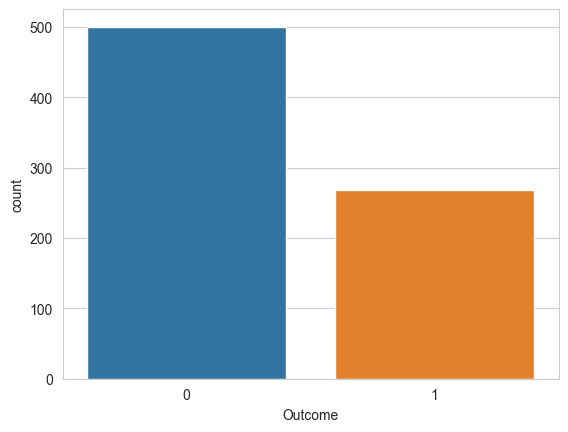

In [66]:
# countplot for outcome variable

sns.countplot(x ='Outcome',data = df_diabetes)

**Conclusion :-** We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

### Outliers

#### Box Plot

<Axes: xlabel='DiabetesPedigreeFunction'>

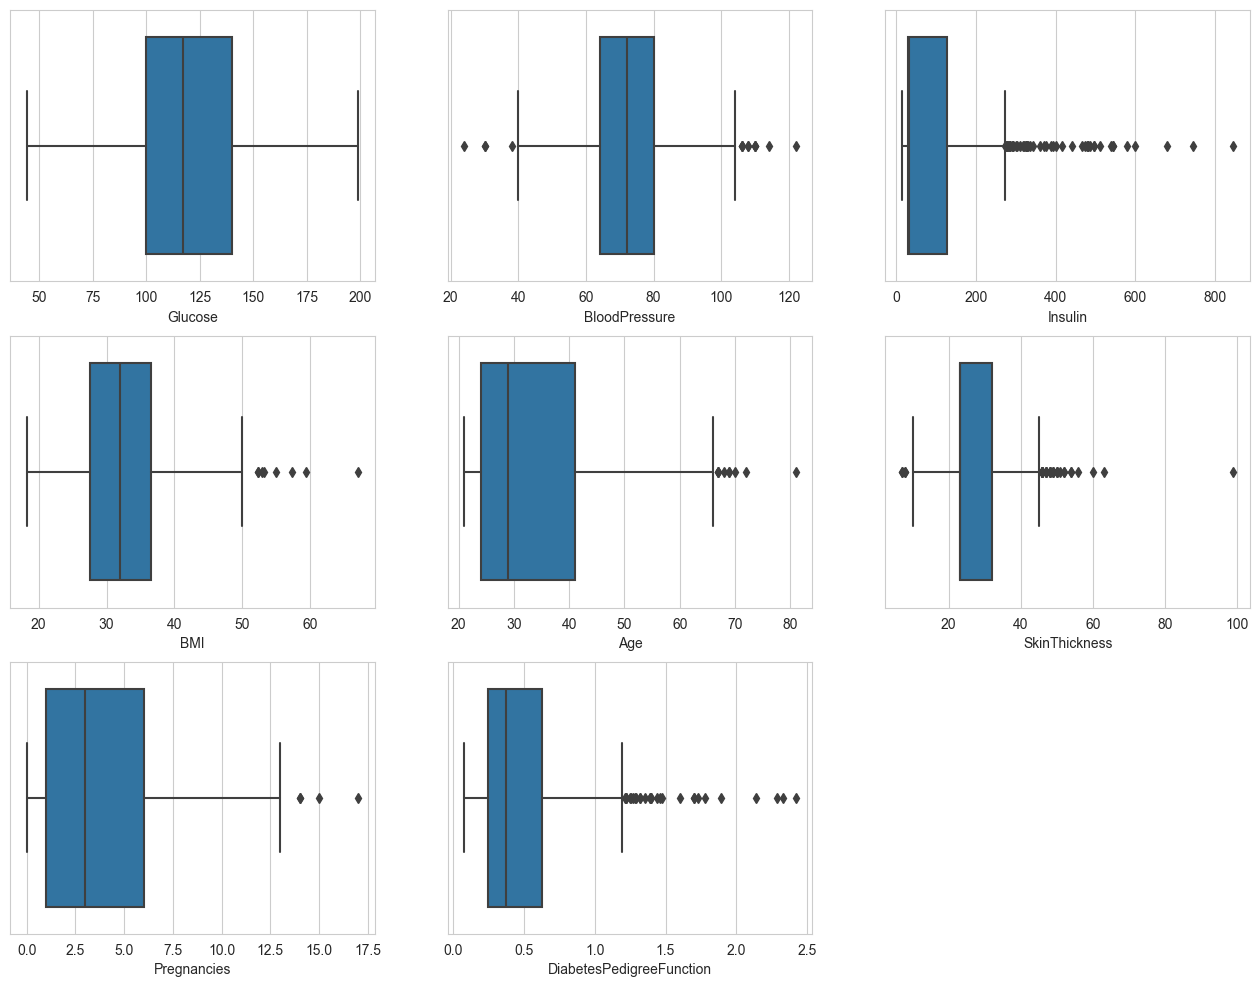

In [82]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df_diabetes)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df_diabetes)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df_diabetes)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df_diabetes)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df_diabetes)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df_diabetes)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df_diabetes)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df_diabetes)

In [68]:
# Finding outlier 

def find_outliers(df, columns):
    outliers = []
    
    for col in columns:
        data = sorted(df[col])
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers.extend(outlier_indices)
    
    outliers = pd.Series(outliers)
    multiple_outliers = outliers
    return multiple_outliers

columns_to_check = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
outlier_indices = find_outliers(df_diabetes, columns_to_check)

In [69]:
print("Total found Outerlier indices are: ", len(outlier_indices))

Total found Outerlier indices are:  148


In [70]:
df_diabetes.loc[outlier_indices, :]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
88            15    136.0           70.0             32    110.0  37.100000   
159           17    163.0           72.0             41    114.0  40.900000   
298           14    100.0           78.0             25    184.0  36.600000   
455           14    175.0           62.0             30     30.5  33.600000   
18             1    103.0           30.0             38     83.0  43.300000   
..           ...      ...            ...            ...      ...        ...   
489            8    194.0           80.0             23     30.5  26.100000   
537            0     57.0           60.0             23     30.5  21.700000   
666            4    145.0           82.0             18     30.5  32.500000   
674            8     91.0           82.0             23     30.5  35.600000   
684            5    136.0           82.0             23     30.5  31.992578   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  
18                      0.183   33        0  
..                        ...  ...      ...  
489                     0.551   67        0  
537                     0.735   67        0  
666                     0.235   70        1  
674                     0.587   68        0  
684                     0.640   69        0  

[148 rows x 9 columns]

**Conclusion :-**
- Outliers are values that do not fall within the IQR range of 25% to 75%.
- they can distort statistical analyses and violate their assumptions.
- Hence, Its important to deal with them.
-  In this case removing outliers can cause data loss so we have to deal with it using various scaling and transformation techniques. 

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

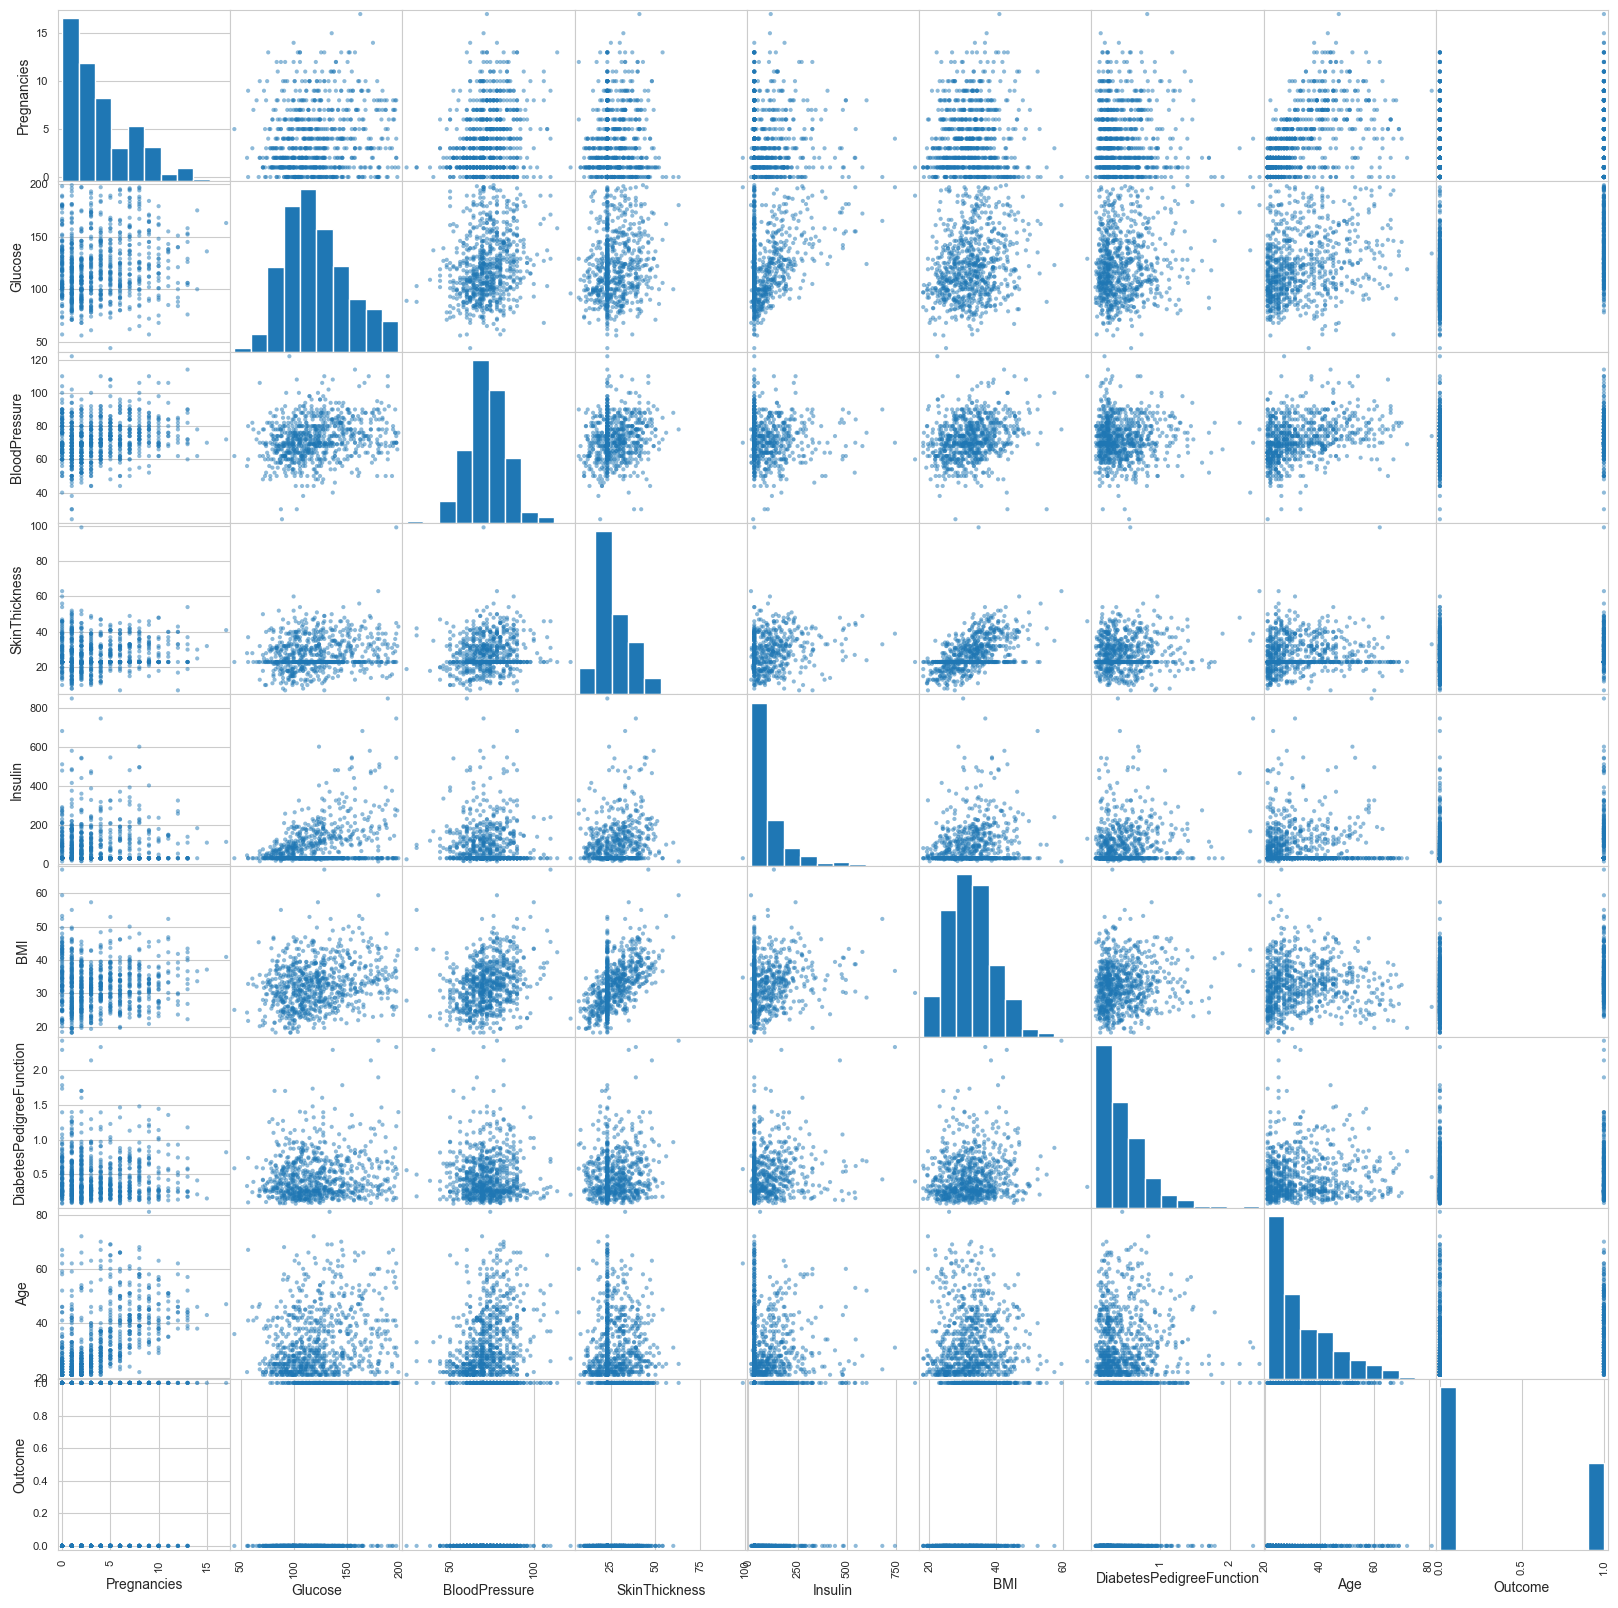

In [71]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_diabetes,figsize=(20,20))

### Correlation

In [72]:
corr = df_diabetes.corr()
corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.032568   
Glucose                      0.127964  1.000000       0.219666       0.172361   
BloodPressure                0.208984  0.219666       1.000000       0.152458   
SkinThickness                0.032568  0.172361       0.152458       1.000000   
Insulin                     -0.055697  0.357081      -0.022049       0.238188   
BMI                          0.021546  0.231478       0.281231       0.546958   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371       0.142977   
Age                          0.544341  0.266600       0.326740       0.054514   
Outcome                      0.221898  0.492908       0.162986       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357081  0.231478                  0.137106   
BloodPressure            -0.022049  0.281231                  0.000371   
SkinThickness             0.238188  0.546958                  0.142977   
Insulin                   1.000000  0.189031                  0.178029   
BMI                       0.189031  1.000000                  0.153508   
DiabetesPedigreeFunction  0.178029  0.153508                  1.000000   
Age                      -0.015413  0.025748                  0.033561   
Outcome                   0.148457  0.312254                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266600  0.492908  
BloodPressure             0.326740  0.162986  
SkinThickness             0.054514  0.189065  
Insulin                  -0.015413  0.148457  
BMI                       0.025748  0.312254  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

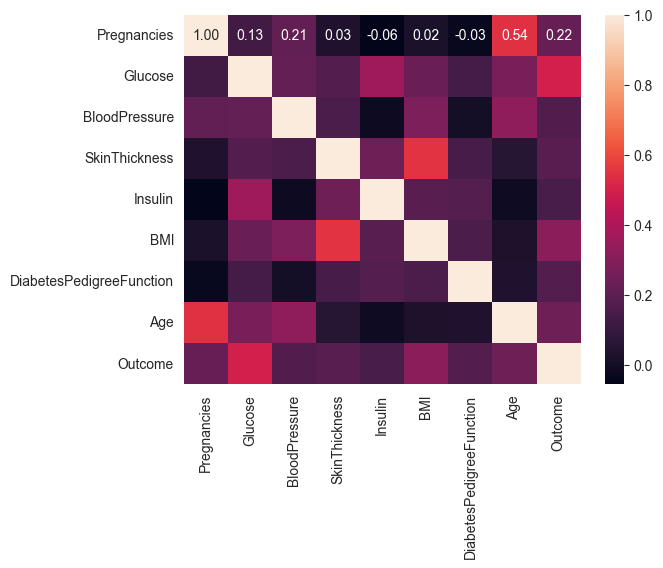

In [73]:
# heatmap for correlation

sns.heatmap(corr, annot=True, fmt="0.2f")

In [29]:
corr = df_diabetes.corr().abs()
us_corr = (corr.unstack()).sort_values(ascending=False)
us_corr = us_corr[(us_corr<1) & (us_corr>0.35)].drop_duplicates().to_frame()
us_corr.columns = ['correlation']
us_corr

correlation
SkinThickness BMI         0.546958
Pregnancies   Age         0.544341
Outcome       Glucose     0.492908
Insulin       Glucose     0.357081

**Conclusion :-**
- Based on the correlation values and heatmap, we can see that some columns have a strong correlation with each other.
- For example, there is a strong correlation between the 'age' and 'pregnancies' columns, as well as between the 'BMI' and 'SkinThickness' columns.
- Additionally, there is a good correlation between the 'glucose' column and the 'outcome' column.


# 6. Data Preprocessing

## Data Transformation

In [84]:
X = df_diabetes.drop('Outcome',axis = 1)
Y = df_diabetes['Outcome']

- We will store the independent variables in the variable 'X' and the dependent variable in the variable 'y'

In [85]:
from sklearn.preprocessing import QuantileTransformer
quantile  = QuantileTransformer()
X = quantile.fit_transform(X)

# 7. Modelling

## 7.1 Split dataset into train and test data

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20, random_state = 0)

- The train-test split is a technique for evaluating the performance of a machine learning algorithm.
- Train: 80%, Test: 20%

In [87]:
x_train.shape , y_train.shape

((614, 8), (614,))

In [88]:
x_test.shape,y_test.shape

((154, 8), (154,))

### 7.2 Models

In [120]:
# Function to calculate Score for test and train

def score_matrix(y1,y2,y3,y4):
	# y1 = y_train, y2 = y_train_pred, y3 = y_test, y4 = y_test_pred
    
    # Calculate metrics for Train Data
    train_accuracy = accuracy_score(y1, y2)
    train_precision = precision_score(y1, y2)
    train_recall = recall_score(y1, y2)
    train_f1 = f1_score(y1, y2)
    train_roc_auc = roc_auc_score(y1, y2)
    train_cr = classification_report(y1, y2)
    
    print("Training Performance:")
    print(f"Accuracy: {train_accuracy}")
    print(f"Precision: {train_precision}")
    print(f"Recall: {train_recall}")
    print(f"F1 Score: {train_f1}")
    print(f"ROC AUC Score: {train_roc_auc}")
    print(f"Classification Report is:\n {train_cr}")
    
    print('='*60)
    
    # Calculate metrics for Test data
    test_accuracy = accuracy_score(y3, y4)
    test_precision = precision_score(y3, y4)
    test_recall = recall_score(y3, y4)
    test_f1 = f1_score(y3, y4)
    test_roc_auc = roc_auc_score(y3, y4)
    test_cr = classification_report(y3, y4)
    
    print("Test Performance:")
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1 Score: {test_f1}")
    print(f"ROC AUC Score: {test_roc_auc}")
    print(f"Classification Report is:\n {test_cr}")
    return

### K Nearest Neighbours :-

In [121]:
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

y_train_pred = knn.predict(x_train)  # Make predictions on the training data
y_test_pred = knn.predict(x_test)  # Make predictions on the test data

In [122]:
score_matrix(y_train,y_train_pred,y_test,y_test_pred)

Training Performance:
Accuracy: 0.8110749185667753
Precision: 0.7464788732394366
Recall: 0.7194570135746606
F1 Score: 0.7327188940092166
ROC AUC Score: 0.7910262167109945
Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       393
           1       0.75      0.72      0.73       221

    accuracy                           0.81       614
   macro avg       0.80      0.79      0.79       614
weighted avg       0.81      0.81      0.81       614

Test Performance:
Accuracy: 0.7792207792207793
Precision: 0.6382978723404256
Recall: 0.6382978723404256
F1 Score: 0.6382978723404256
ROC AUC Score: 0.7397096838337642
Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       107
           1       0.64      0.64      0.64        47

    accuracy                           0.78       154
   macro avg       0.74      0.74      0.74       154
weighted 

In [123]:
# Hyperparameters to tuning

param_grid = {
    'n_neighbors': np.arange(1, 20),  # Try different values of k
    'p': [1, 2],  # Use both Manhattan (p=1) and Euclidean (p=2) distance metrics
    'weights': ['uniform', 'distance']
}

#Making model
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_p = grid_search.best_params_['p']
best_model = grid_search.best_estimator_

#Best Hyperparameters Value
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best K: {best_k}")
print(f"Best p: {best_p}")
print(f"Test Accuracy: {accuracy}")

Best K: 19
Best p: 1
Test Accuracy: 0.8246753246753247



 Confusion Matrix:



<Axes: >

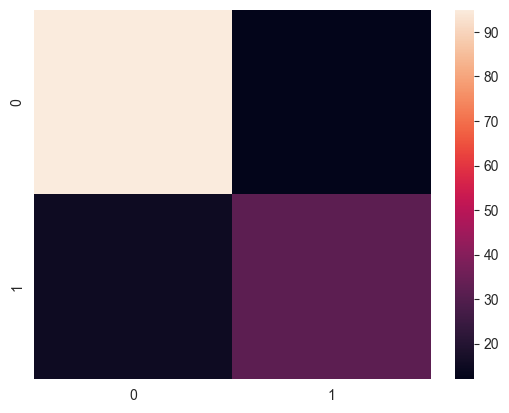

In [124]:
# confusion_matrix
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_pred))

### Naive Bayes :-

In [125]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

y_train_pred = gaussian.predict(x_train)  # Make predictions on the training data
y_test_pred = gaussian.predict(x_test)  # Make predictions on the test data

In [126]:
score_matrix(y_train,y_train_pred,y_test,y_test_pred)

Training Performance:
Accuracy: 0.747557003257329
Precision: 0.6363636363636364
Recall: 0.6968325791855203
F1 Score: 0.6652267818574513
ROC AUC Score: 0.7364570020609535
Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       393
           1       0.64      0.70      0.67       221

    accuracy                           0.75       614
   macro avg       0.73      0.74      0.73       614
weighted avg       0.75      0.75      0.75       614

Test Performance:
Accuracy: 0.7857142857142857
Precision: 0.6296296296296297
Recall: 0.723404255319149
F1 Score: 0.6732673267326733
ROC AUC Score: 0.7682441837343408
Classification Report is:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       107
           1       0.63      0.72      0.67        47

    accuracy                           0.79       154
   macro avg       0.75      0.77      0.76       154
weighted av

In [127]:
# Hyperparameters to tuning
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

#Making model
grid_search = GridSearchCV(gaussian, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_var_smoothing = grid_search.best_params_['var_smoothing']
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best var_smoothing: {best_var_smoothing}")
print(f"Test Accuracy: {accuracy}")

Best var_smoothing: 0.8111308307896871
Test Accuracy: 0.7857142857142857



 Confusion Matrix:



<Axes: >

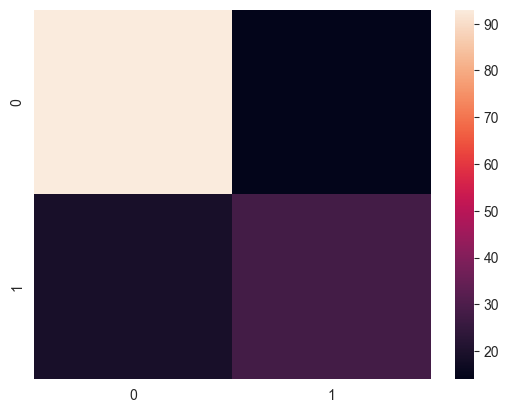

In [128]:
# confusion_matrix
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_pred))

### Decision Tree

In [129]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_train_pred = decision_tree.predict(x_train)  # Make predictions on the training data
y_test_pred = decision_tree.predict(x_test)  # Make predictions on the test data

In [130]:
score_matrix(y_train,y_train_pred,y_test,y_test_pred)

Training Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       221

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Test Performance:
Accuracy: 0.7662337662337663
Precision: 0.6122448979591837
Recall: 0.6382978723404256
F1 Score: 0.625
ROC AUC Score: 0.7303638894412409
Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       107
           1       0.61      0.64      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



In [131]:
# Hyperparameters to tuning
param_grid = {
    'max_depth': np.arange(1, 21),  # Vary the maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best max_depth: {best_max_depth}")
print(f"Best min_samples_split: {best_min_samples_split}")
print(f"Best min_samples_leaf: {best_min_samples_leaf}")
print(f"Test Accuracy: {accuracy}")

Best max_depth: 2
Best min_samples_split: 2
Best min_samples_leaf: 1
Test Accuracy: 0.7597402597402597



 Confusion Matrix:



<Axes: >

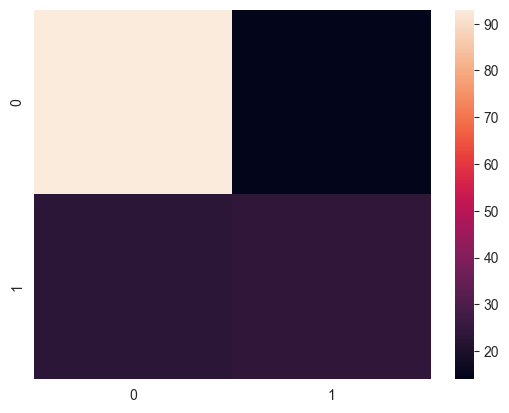

In [132]:
# confusion_matrix
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_pred),)

### Random Forest :-

In [133]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

y_train_pred = random_forest.predict(x_train)  # Make predictions on the training data
y_test_pred = random_forest.predict(x_test)  # Make predictions on the test data

In [134]:
score_matrix(y_train,y_train_pred,y_test,y_test_pred)

Training Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Classification Report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       221

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Test Performance:
Accuracy: 0.7987012987012987
Precision: 0.6904761904761905
Recall: 0.6170212765957447
F1 Score: 0.651685393258427
ROC AUC Score: 0.7477629747464706
Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



In [135]:
# Hyperparameters to tuning

param_grid = {
    'n_estimators': [100, 150],  # Vary the number of trees in the forest
    'max_depth': [None, 10, 20],  # Vary the maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

#Making model
grid_search = GridSearchCV(random_forest, param_grid, cv=4, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
best_model = grid_search.best_estimator_

#Best Hyperparameters Value
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best max_depth: {best_max_depth}")
print(f"Best min_samples_split: {best_min_samples_split}")
print(f"Best min_samples_leaf: {best_min_samples_leaf}")
print(f"Test Accuracy: {accuracy}")

Best n_estimators: 150
Best max_depth: 10
Best min_samples_split: 2
Best min_samples_leaf: 2
Test Accuracy: 0.8246753246753247



 Confusion Matrix:



<Axes: >

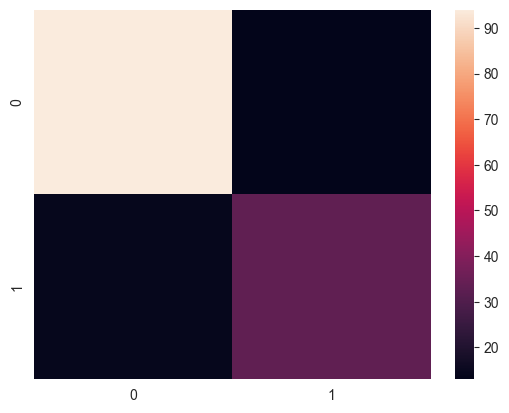

In [136]:
# confusion_matrix
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,y_pred))

# 8 Cross Validation

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Specify the number of folds (k=10 for 10-fold cross-validation)
kfold = KFold(n_splits=10, shuffle=True, random_state=33)

In [138]:
# Cross validation for Random Forest

# Perform 10-fold cross-validation and calculate accuracy as the evaluation metric
scores = cross_val_score(random_forest, X, Y, cv=kfold, scoring='accuracy')


# Print the cross-validation scores for each fold
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

# Calculate and print the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()
print(f"Mean Accuracy: {mean_score}")
print(f"Standard Deviation: {std_score}")

Fold 1: 0.8181818181818182
Fold 2: 0.7012987012987013
Fold 3: 0.7402597402597403
Fold 4: 0.7662337662337663
Fold 5: 0.7272727272727273
Fold 6: 0.7662337662337663
Fold 7: 0.8181818181818182
Fold 8: 0.8441558441558441
Fold 9: 0.7368421052631579
Fold 10: 0.7763157894736842
Mean Accuracy: 0.7694976076555023
Standard Deviation: 0.04328650596824891


In [139]:
# Cross validation for Decision Tree

# Perform 10-fold cross-validation and calculate accuracy as the evaluation metric
scores = cross_val_score(decision_tree, X, Y, cv=kfold, scoring='accuracy')


# Print the cross-validation scores for each fold
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

# Calculate and print the mean and standard deviation of the scores
mean_score = scores.mean()
std_score = scores.std()
print(f"Mean Accuracy: {mean_score}")
print(f"Standard Deviation: {std_score}")

Fold 1: 0.6753246753246753
Fold 2: 0.6493506493506493
Fold 3: 0.6233766233766234
Fold 4: 0.7532467532467533
Fold 5: 0.7142857142857143
Fold 6: 0.6363636363636364
Fold 7: 0.7012987012987013
Fold 8: 0.7532467532467533
Fold 9: 0.6052631578947368
Fold 10: 0.7105263157894737
Mean Accuracy: 0.6822282980177717
Standard Deviation: 0.04989859454347826
